# Greeks Tutorial:

### Delta, Gamma, Theta

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
from scipy.stats import norm

In [2]:
# Importing data
data = pd.read_csv('/Users/aryankejriwal/Desktop/UTC_2022/UTC_training_data.csv')

In [3]:
# An underlying price path
S = pd.Series(data['0'])

THIS IS JUST THE FIRST SAMPLE OF THE TRAINING DATA, WHICH YOU CAN USE

In [4]:
# Defining a set of random prices for the call
np.random.seed(10)
C_example = pd.Series(np.random.normal(0,1,1000))

In [5]:
def delta(C):
    return np.abs((C - C.shift(1))/(S - S.shift(1))).dropna()

In [6]:
def gamma(C):
    return np.abs((delta(C) - delta(C).shift(1))/(S - S.shift(1))).dropna()

In [7]:
def theta(C):
    return np.abs((C - C.shift(1)) * 1000).dropna()

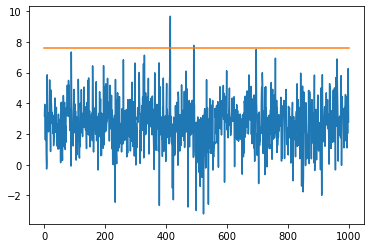

In [8]:
plt.plot(np.log(delta(C_example)))
plt.plot(np.zeros(1000) + np.log(2000))

Two or three violations

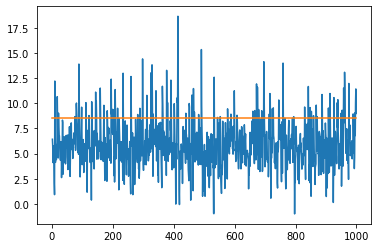

In [9]:
plt.plot(np.log(gamma(C_example)))
plt.plot(np.zeros(1000) + np.log(5000))

Several violations

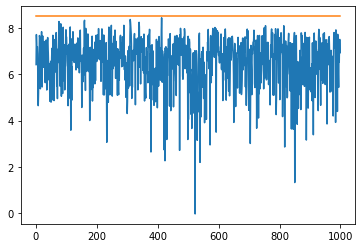

In [10]:
plt.plot(np.log(theta(C_example)))
plt.plot(np.zeros(1000) + np.log(5000))

No violations

### Vega

- This is computed explicitly for options, using the Black-Scholes formula. Add up vegas of all options in your portfolio.
- Since we have call prices, we compute implied volatility using an algorithm below. Alternatively, check out the vollib library for built in functions
- Then use the same numerical derivative above to get the local vega (or could use BSM formula)

In [11]:
# Recall BSM Formulas:

def d1(S,K,T,r,sigma):
    return(np.log(S/K)+(r+sigma**2/2.)*T)/(sigma*np.sqrt(T))
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*np.sqrt(T)

def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*np.exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
def bs_put(S,K,T,r,sigma):
    return K*np.exp(-r*T)-S+bs_call(S,K,T,r,sigma)

In [12]:
# Implied Volatility:

def iv_call(S,K,T,r,C):
    return fsolve((lambda sigma: np.abs(bs_call(S,K,T,r,sigma) - C)), [1])[0]
                      
def iv_put(S,K,T,r,P):
    return fsolve((lambda sigma: np.abs(bs_put(S,K,T,r,sigma) - P)), [1])[0]

For the purposes of this demo, $\textbf{assume C is a call with K = 100}$. You can adjust these settings easily. 

In [13]:
def vega(C):
    T = np.linspace(1.499,0.5,1000)
    ivs = []
    for i in range(1000):
        ivs.append(iv_call(np.array(S)[i],100,T[i],0,np.array(C)[i]))
    ivs = pd.Series(ivs)
    return np.abs((C - C.shift(1))/(ivs - ivs.shift(1))).dropna()

In [14]:
vegas = vega(C_example)

/Users/aryankejriwal/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


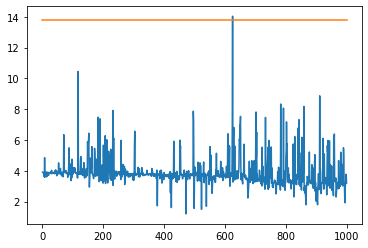

In [15]:
plt.plot(np.log(vegas))
plt.plot(np.zeros(1000) + np.log(1000000))

One violation